# PhysicsTool: Overview

`PhysicsTool` is designed to simplify error propagation and analysis in physics experiments. It provides a streamlined way to work with quantities that have both means and errors, using `Err` objects to manage error propagation automatically.

### Key Features
- Handle and propagate errors using custom `Err` objects.
- Perform linear regression with error estimation.
- Automatically derive error formulas with symbolic computation using `sympy`.
- Plot results with error bands using built-in visualization tools.


In [ ]:
import PhysicsTool as pt
import pandas as pd                                                         
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sys import stdout
np.random.seed(0)

# Working with Err Objects

In this section, we will demonstrate how to create `Err` objects that represent quantities with both a mean and an associated error. The `Err` class simplifies calculations involving uncertainties by handling both the mean and the error simultaneously.

### Methods:
- `Err`: Create an `Err` object from a mean and error.
- `Err.from_data`: Automatically calculate the mean and standard deviation (error) from a data series.

We will first generate random data and create `Err` objects using both methods.


Here I generate the raw data used in this example.
We are interested in the following 3 Quantities:
 - $x$: Of which we know the mean and error
 - $y$: Of which we are given 10 measurements
 - $z$: Of which we are given 5 series of 10 measurements 

In [2]:
x_center = 1.4546354
y_center = 0.0013409
z_center = 1531.5091

x_mean = x_center
x_error = 0.64813414

NR_MEASUREMENTS = 20
NR_SERIES = 5

y_data = np.random.standard_normal(NR_MEASUREMENTS) * 0.5 + y_center
z_data = np.random.standard_normal((NR_SERIES, NR_MEASUREMENTS)) * np.linspace(0.1, 5, NR_SERIES)[:, None] + z_center

raw_data_table = pd.DataFrame({
    'y' : y_data,
} | {
    f'z_{i}' : col for i, col in enumerate(z_data)
})
print(f'x mean: {x_mean}\nx error: {x_error}')
display(raw_data_table)

x mean: 1.4546354
x error: 0.64813414


,y,z_0,z_1,z_2,z_3,z_4
0,0.883367,1531.253801,1530.119767,1529.794326,1527.110659,1540.924853
1,0.201420,1531.574462,1529.627576,1530.592239,1534.909720,1524.770305
2,0.490710,1531.595544,1529.248292,1529.435577,1533.266976,1525.156675
3,1.121787,1531.434883,1534.093877,1527.107079,1525.709780,1536.356084
4,0.935120,1531.736075,1530.833811,1531.961537,1537.127252,1525.643483
5,-0.487298,1531.363663,1530.928652,1530.484559,1538.666082,1541.227206
6,0.476385,1531.513676,1529.849146,1527.352094,1535.958993,1529.441005
7,-0.074338,1531.490382,1532.539275,1532.689195,1530.829884,1527.771826
8,-0.050269,1531.662378,1529.370685,1529.195489,1527.467009,1541.123810
9,0.206640,1531.656036,1531.227219,1531.641561,1535.489655,1538.911674


The error objects for $x$ and $y$ can be generated directly and using the `err.from_data()` method 

In [3]:
x_val = pt.Err(x_mean, x_error)
y_val = pt.Err.from_data(y_data)


These objects can be displayed using IPython functions or logged with a logger that provides additional features.

In [4]:
display(x_val)
display(y_val)
pt.log(x_val)
pt.log(y_val)

1.5 ± 0

0.29 ± 0

1.5 ± 0

$1.5 \pm 0$


0.29 ± 0

$0.29 \pm 0$


We could generate a single error object for the measurements of $z$. But we might want to calculate mean and error for each series separately. That's why the  `Err.from_data` method includes the `axis` argument to specify along what axis the mean and error should be computed

In [5]:
z_vals_grouped = pt.Err.from_data(z_data, axis = 1)

There are many ways to display the data stored in an `Err` object. Below multiple different ways to do this are shown.

In [6]:


display_example_table = pd.DataFrame()
display_example_table['z'] = z_vals_grouped
display(display_example_table)
display_example_table.index.name = 'i'
print('simple print statement\n')
print(z_vals_grouped)
print('\ntoString() showcasing custom arguments\n')
z_vals_grouped.format = pt.err_format.ENG_FORMAT_REL
print(z_vals_grouped.toString())
z_vals_grouped.format = pt.err_format.SCI_FORMAT_REL
print('printing latex representation')
print(z_vals_grouped.latex())
print('\nsimple IPython display\n')
display(z_vals_grouped)
print('\nlogging a DataFrame, this can optionally write the LaTex representation to a TextIO Stream\n')
pt.log(display_example_table, tex = stdout)

,z
0,((((1.53151 ± 0) × 10^3)))
1,((((1.5310 ± 0) × 10^3)))
2,((((1.5306 ± 0) × 10^3)))
3,((((1.5331 ± 0) × 10^3)))
4,((((1.534 ± 0) × 10^3)))


simple print statement

(1.53151 ± 0) × 10^3
(1.5310 ± 0) × 10^3
(1.5306 ± 0) × 10^3
(1.5331 ± 0) × 10^3
(1.534 ± 0) × 10^3

toString() showcasing custom arguments

(1.531515 ± 0%) × 10^3
(1.53099 ± 0%) × 10^3
(1.53061 ± 0%) × 10^3
(1.53310 ± 0%) × 10^3
(1.5340 ± 0%) × 10^3
printing latex representation
$(1.53151 \pm 0\%) \times 10^{3}$\\$(1.5310 \pm 0\%) \times 10^{3}$\\$(1.5306 \pm 0\%) \times 10^{3}$\\$(1.5331 \pm 0\%) \times 10^{3}$\\$(1.534 \pm 0\%) \times 10^{3}$

simple IPython display



(1.53151 ± 0%) × 10^3
(1.5310 ± 0%) × 10^3
(1.5306 ± 0%) × 10^3
(1.5331 ± 0%) × 10^3
(1.534 ± 0%) × 10^3


logging a DataFrame, this can optionally write the LaTex representation to a TextIO Stream



,z
i,
0,((((1.53151 ± 0) × 10^3)))
1,((((1.5310 ± 0) × 10^3)))
2,((((1.5306 ± 0) × 10^3)))
3,((((1.5331 ± 0) × 10^3)))
4,((((1.534 ± 0) × 10^3)))


\begin{table}[H]
\centering
\begin{tabular}{l}
\toprule
z \\
\midrule
$(1.53151 \pm 0) \times 10^{3}$ \\
$(1.5310 \pm 0) \times 10^{3}$ \\
$(1.5306 \pm 0) \times 10^{3}$ \\
$(1.5331 \pm 0) \times 10^{3}$ \\
$(1.534 \pm 0) \times 10^{3}$ \\
\bottomrule
\end{tabular}
\caption{Caption}
\label{tab:labelname}
\end{table}



`Err` objects can be indexed just like numpy arrays

In [7]:
format_example = pt.Err(
    [1509, 0.0094563456, 9453634, 594436345,  1.13414536, 15 , 0.000001, 100],
    [0   , 0           , 0.9    , 45636464    , 0.0001     , 600, 0.3,   0.01]
)

display(format_example)
format_example.format = pt.err_format.SCI_FORMAT_REL
display(format_example)

(1.5090 ± 0) × 10^3
(9.4563 ± 0) × 10^-3
(9.4536340 ± 0) × 10^6
(5.9 ± 0) × 10^8
1.1341 ± 0
15 ± 6
(1 ± 3) × 10^-6
100.00 ± 0

(1.5090 ± 0%) × 10^3
(9.4563 ± 0%) × 10^-3
(9.4536340 ± 0%) × 10^6
(5.9 ± 7%) × 10^8
1.1341 ± 0%
15 ± 4%
(1 ± 3%) × 10^-6
100.00 ± 0%

In [8]:
display(z_vals_grouped[3])
display(z_vals_grouped[z_vals_grouped.err < 0.5])
for i, z_val in enumerate(z_vals_grouped[0:2]):
    print(f'{i}: {z_val}')

(1.5331 ± 0%) × 10^3

(1.53151 ± 0%) × 10^3
(1.5310 ± 0%) × 10^3
(1.5306 ± 0%) × 10^3

0: (1.53151 ± 0%) × 10^3
1: (1.5310 ± 0%) × 10^3


We can now compute the average over the different series. Note how the weighted average gives a more accurate result.

In [9]:
z_val_1 = z_vals_grouped.average()
z_val_2 = z_vals_grouped.weighted_average()

display(z_val_1)
display(z_val_2)

(1.5320 ± 0%) × 10^3

(1.53151 ± 0%) × 10^3

It is also possible to automate a big part of the error calculation using `sympy`.

In [10]:
a,x,y,z,w = sympy.symbols('a,x,y,z,w')

print('our initial equation')
some_equation = sympy.Eq(w + y - sympy.sin(x), a * sympy.exp(y * sympy.sin(x)) / z + 2)
display(some_equation)

print('our equation solved for w')
w_expr = sympy.solve(some_equation, w)[0]
display(w_expr)

print('error derivation of w assuming x,y,z are values with errors and a is a constant')
pt.derive_err(w_expr, values = [x,y,z], target_symbol=w, do_display=True, tex = stdout)

our initial equation


Eq(w + y - sin(x), a*exp(y*sin(x))/z + 2)

our equation solved for w


a*exp(y*sin(x))/z - y + sin(x) + 2

error derivation of w assuming x,y,z are values with errors and a is a constant


Eq(s_w**2, s_x**2*Derivative(w(x, z, y), x)**2 + s_y**2*Derivative(w(x, z, y), y)**2 + s_z**2*Derivative(w(x, z, y), z)**2)

\[
s_{w}^{2} = s_{x}^{2} \left(\frac{\partial}{\partial x} w{\left(x,z,y \right)}\right)^{2} + s_{y}^{2} \left(\frac{\partial}{\partial y} w{\left(x,z,y \right)}\right)^{2} + s_{z}^{2} \left(\frac{\partial}{\partial z} w{\left(x,z,y \right)}\right)^{2}
\]


Eq(s_w**2, s_x**2*(a*y*exp(y*sin(x))*cos(x)/z + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x)/z - 1)**2 + s_z**2*(-a*exp(y*sin(x))/z**2)**2)

\[
s_{w}^{2} = s_{x}^{2} \left(\frac{a y e^{y \sin{\left(x \right)}} \cos{\left(x \right)}}{z} + \cos{\left(x \right)}\right)^{2} + s_{y}^{2} \left(\frac{a e^{y \sin{\left(x \right)}} \sin{\left(x \right)}}{z} - 1\right)^{2} + s_{z}^{2} \left(- \frac{a e^{y \sin{\left(x \right)}}}{z^{2}}\right)^{2}
\]


Eq(s_w, sqrt(s_x**2*(a*y*exp(y*sin(x))*cos(x)/z + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x)/z - 1)**2 + s_z**2*(-a*exp(y*sin(x))/z**2)**2))

\[
s_{w} = \sqrt{s_{x}^{2} \left(\frac{a y e^{y \sin{\left(x \right)}} \cos{\left(x \right)}}{z} + \cos{\left(x \right)}\right)^{2} + s_{y}^{2} \left(\frac{a e^{y \sin{\left(x \right)}} \sin{\left(x \right)}}{z} - 1\right)^{2} + s_{z}^{2} \left(- \frac{a e^{y \sin{\left(x \right)}}}{z^{2}}\right)^{2}}
\]


sqrt(s_x**2*(a*y*exp(y*sin(x))*cos(x)/z + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x)/z - 1)**2 + s_z**2*(-a*exp(y*sin(x))/z**2)**2)

Using the same `sympy` expressions we can calculate the error of the expressions using our measured values

In [11]:
A_VAL = np.pi * 300

w_grouped_val = pt.calc_err(w_expr, {a : A_VAL, x: x_val, y: y_val, z: z_vals_grouped})
w_val_1 = w_grouped_val.average()
w_val_2 = pt.calc_err(w_expr, {a : A_VAL, x: x_val, y: y_val, z: z_val_1})
theoretical_val = pt.calc_err(w_expr, {a: A_VAL, x: x_center, y: y_center, z: z_center})
print('The error when computed for each value in the grouped z vals separately')
display(w_grouped_val)
print('The average of the values above')
display(w_val_1)
print('The error when computed for the averaged z value')
display(w_val_2)
print('The value computed with the true means of the distribution')
display(theoretical_val)

assert w_val_1.approx_eq(theoretical_val, tolerance=10)
assert w_val_2.approx_eq(theoretical_val, tolerance=10)

The error when computed for each value in the grouped z vals separately


3.52 ± 0
3.53 ± 0
3.53 ± 0
3.52 ± 0
3.52 ± 0

The average of the values above


3.52 ± 0

The error when computed for the averaged z value


3.52 ± 0

The value computed with the true means of the distribution


3.6081 ± 0

It is also possible to use operators on the `Err` objects directly. Not however that for some expressions the result using the direct evaluation will differ from the result using the `calc_err` method.

In [12]:
u_val_1 = pt.calc_err(x + y**2 + y, {x: x_val, y: y_val})
u_val_2 = x_val + y_val**2 + y_val 
#since the terms y_val**2 and y_val are evaluated separately their correlation will not be captured in the final result. 
#In this case it is better to use the calc_err method
display(u_val_1)
display(u_val_2)
assert not u_val_1.allclose(u_val_2)

1.8 ± 0

1.8 ± 0

In [13]:
v_val_1 = pt.calc_err(x**sympy.sin(y**0.5), {x: x_val, y: y_val})
v_val_2 = x_val**(y_val**0.5).apply(sympy.sin) 
#if every independent variable only appears once in the expression the result of calc_err and direct evaluation will match up!
#In this case direct evaluation is sufficent
display(v_val_1)
display(v_val_2)
assert v_val_1.allclose(v_val_2)

1.2 ± 0

1.2 ± 0

In [14]:
x_val = pt.Err(1.414, 0.61)
other = 3.141
tests = [
    x_val + other,
    other + x_val,
    x_val - other,
    other - x_val,
    x_val * other,
    other * x_val,
    x_val / other,
    other / x_val,
    x_val ** other,
    other ** x_val,
    ]
display(*tests)

4.6 ± 0

4.6 ± 0

-1.7 ± 0

1.7 ± 0

4 ± 1

4 ± 1

0.5 ± 0

2.2 ± 1

2 ± 4

5 ± 3

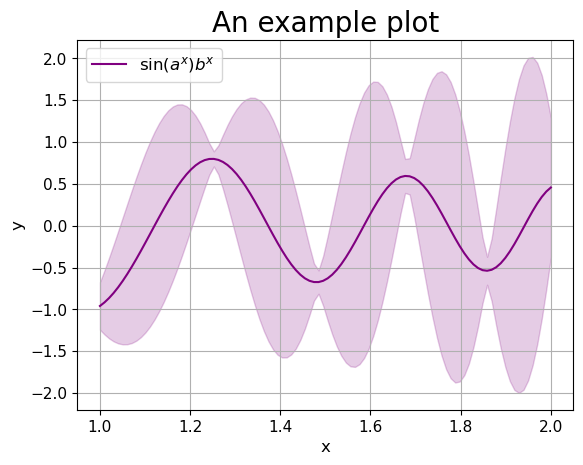

In [15]:
x_data = np.linspace(1,2, 100)
a_val = pt.Err(5,1)
b_val = pt.Err(-1,0.5)
a,b,x = sympy.symbols('a,b,c')
expr = sympy.sin(a*x**2)*x**b
y_data = pt.calc_err(expr, {a: a_val, b:b_val, x:x_data})
pt.start_plt('An example plot', 'x', 'y', fontsize=20)
pt.err_band_plot(x_data, y_data.mean, y_data.err, label=r'$\sin(a^x)b^x$', color = 'purple')
pt.end_plt()

# Error Calculation Methods: A Comparison

There are multiple ways to calculate the error in linear regression, depending on how residuals and uncertainties are handled. Here, we explore three methods:

1. **Script**: This method uses a manual script-based calculation.
2. **Residuals**: This method calculates the residuals and weights the regression based on them.
3. **Covariance**: This method uses the covariance matrix to compute the regression parameters.

Each of these methods provides a different way to handle uncertainties, and we will visually compare them below.


# Linear Regression Results: Interpretation

After performing linear regression using weighted least squares, we obtain the slope, intercept, and their respective errors. These parameters allow us to model the relationship between the independent variable (`x`) and the dependent variable (`y`).

### Key Results:
- **Slope**: The rate of change in `y` with respect to `x`, along with its uncertainty.
- **Intercept**: The point where the regression line intersects the y-axis, also with an associated error.
- **Weighted Mean**: The average of the `x` and `y` values, weighted by their errors.
  
These results provide insight into how well our model fits the data and how uncertainty in the measurements affects the model.


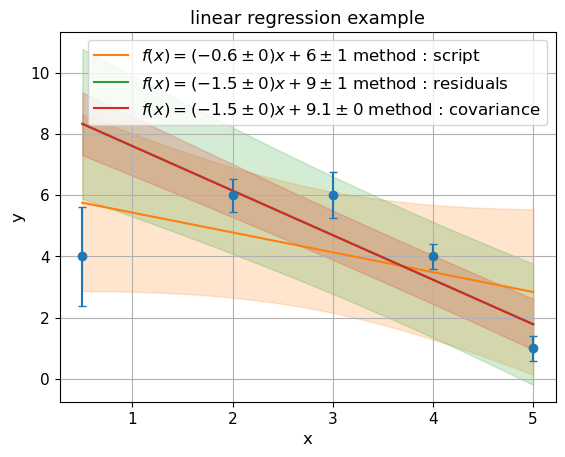

In [16]:
x_data = np.array([0.5, 2, 3, 4, 5])
y_data = pt.Err(
    np.array([4, 6, 6, 4, 1]),
    np.array([5.4, 1.8, 2.5, 1.4, 1.4])*0.3
    )


pt.start_plt('linear regression example', 'x', 'y')

plt.errorbar(x_data, y_data.mean, y_data.err, capsize=3, fmt='o')


for method in ['script', 'residuals', 'covariance']:
    slope, intercept, x_center, y_center = pt.linregress.linear_linregress(x_data, y_data, method)
    x_data_linregress = np.linspace(x_data.min(), x_data.max())
    #the shift by x_center is necessary to ensure proper error calculation
    y_data_linregress = slope*(x_data_linregress-x_center)+x_center*slope.mean + intercept 

    pt.err_band_plot(x_data_linregress, y_data_linregress.mean, y_data_linregress.err, f'$f(x) = ({slope[0].latex(delimiter='')}) x + {intercept[0].latex(delimiter='')}$ method : {method}')

pt.end_plt()

In [17]:
# Unit Tests for Err Objects

# Test 1: Arithmetic with constants
x_val = pt.Err(1.414, 0.61)
const = 3.141

assert (x_val + const).approx_eq(pt.Err(1.414 + 3.141, 0.61), tolerance=0.001)
assert (x_val * const).approx_eq(pt.Err(1.414 * 3.141, 0.61 * 3.141), tolerance=0.001)

# Test 2: Arithmetic between Err objects
y_val = pt.Err(2.718, 0.22)
assert (x_val + y_val).approx_eq(pt.Err(1.414 + 2.718, np.sqrt(0.61**2 + 0.22**2)), tolerance=0.001)

# Test 3: Weighted average calculation
z_vals_grouped = pt.Err.from_data(np.random.standard_normal((5, 10)) * 0.5 + 1, axis=1)
z_avg = z_vals_grouped.weighted_average()
assert isinstance(z_avg, pt.Err)
print("All tests passed!")


All tests passed!


In [18]:
a, b, c, other = sympy.symbols('a, b, c, other')

print(other)

expr = a+b+c+other
try:
    x = pt.calc_err(expr,{
        a : pt.Err(1,1),
        b : 1
    })
except Exception as e:
    print(e)

other
Missing value for required symbols: 'c', 'other'


In [19]:
# Performance Test: Large Dataset

large_x_data = np.linspace(1, 100, 10_000)
large_y_data = pt.Err(large_x_data * 2 + np.random.normal(0, 0.5, 10_000), np.ones(10_000) * 0.3)

# Linear regression on large data
%time slope, intercept, _, _ = pt.linregress.linear_linregress(large_x_data, large_y_data, 'covariance')


CPU times: total: 1min 34s
Wall time: 16.1 s
